In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Boosting Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [127]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Drop some unacassary columns

In [129]:
df.drop(['Timestamp','comments'],axis=1,inplace=True)

Now we do some basic cleaning process

In [130]:
df.drop_duplicates()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [131]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

Self_employe and work_interfer has null values

In [132]:
# Before
print(df[['self_employed', 'work_interfere']].isnull().sum())

# After fill (example)
df['self_employed'] = df['self_employed'].fillna('No')
df['work_interfere'] = df['work_interfere'].fillna('Do Not Know')

# After
print(df[['state', 'self_employed', 'work_interfere']].isnull().sum())


self_employed      18
work_interfere    264
dtype: int64
state             515
self_employed       0
work_interfere      0
dtype: int64


NOw first take age feature

In [133]:
#print(df['Age'].value_counts())

#Age column need cleaning manny age are 1000 or in (-)
# Keep only rows where age is between 18 and 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
# Check the cleaned Age column
df['Age'].value_counts()


Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64

Now we take gender column

In [134]:
df['Gender'].value_counts()
# Step 1: Clean formatting
df['Gender'] = df['Gender'].str.lower().str.strip()

male_terms = [
    'male', 'm', 'man', 'cis male', 'cis man', 'make', 'malr', 'msle', 'mail',
    'guy (-ish) ^_^', 'male (cis)', 'male-ish', 'maile', 'mal', 'ostensibly male, unsure what that really means'
]

female_terms = [
    'female', 'f', 'cis female', 'woman', 'femail', 'femake', 'female (cis)', 'cis-female/femme', 
    'female (trans)', 'trans-female', 'woman'
]

other_terms = [
    'trans woman', 'male leaning androgynous', 'neuter', 'queer', 'enby', 'agender', 'something kinda male?',
    'non-binary', 'queer/she/they', 'androgyne', 'fluid', 'genderqueer', 'nah'
]


In [135]:
def clean_gender(gender):
    if gender in male_terms:
        return 'Male'
    elif gender in female_terms:
        return 'Female'
    elif gender in other_terms:
        return 'Other'
    else:
        return 'Other'  # for any unknown or rare cases

df['Gender'] = df['Gender'].apply(clean_gender)

In [136]:
print(df['Gender'].value_counts())


Gender
Male      988
Female    250
Other      13
Name: count, dtype: int64


In [137]:
df['Country'].value_counts()

Country
United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Cz

In [138]:
#after that we take top 4 country and mark all other country as "other"
top_4 = ['United States', 'United Kingdom', 'Canada', 'Germany']

df['Country'] = df['Country'].apply(lambda x: x if x in top_4 else 'Other')

print(df['Country'].value_counts())


Country
United States     746
Other             204
United Kingdom    184
Canada             72
Germany            45
Name: count, dtype: int64


Now we take state column

In [139]:
print(df['state'].value_counts())

state
CA    138
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
IN     27
OH     27
MI     22
MN     20
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64


In [140]:
# Drop 'state' due to high missing values
df.drop(columns=['state'], inplace=True)

In [141]:
#To check there is not any 'NaN' values in the dataset
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")


Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]

Gender: ['Female' 'Male' 'Other']

Country: ['United States' 'Canada' 'United Kingdom' 'Other' 'Germany']

self_employed: ['No' 'Yes']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Do Not Know']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

tech_company: ['Yes' 'No']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know" 'No']

anonymity: ['Yes' "Don't know" 'No']

leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_health_consequence: ['No' 'Maybe' 'Yes']

phys_health_consequence: ['No' 'Yes' 'Maybe']

coworkers: ['Some of them' 'No' 'Yes']

supervisor: ['Yes' 'No' 'Some of them']

Now we do some EDA to find relation

C:\Users\PC\AppData\Local\Temp\ipykernel_11688\1386494831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df, palette='pastel')


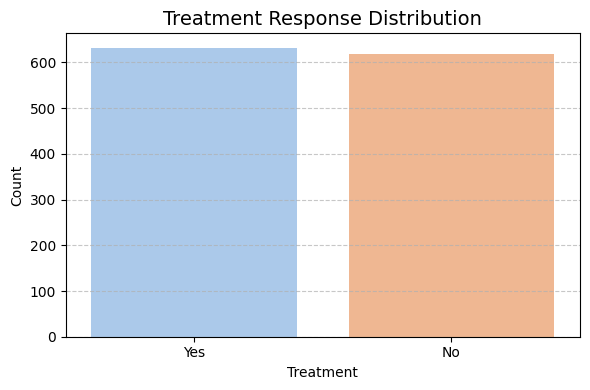

In [142]:
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df, palette='pastel')
plt.title('Treatment Response Distribution', fontsize=14)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Treatment column has no outliers also this column is not unbalance

Text(0.5, 0, 'Gender')

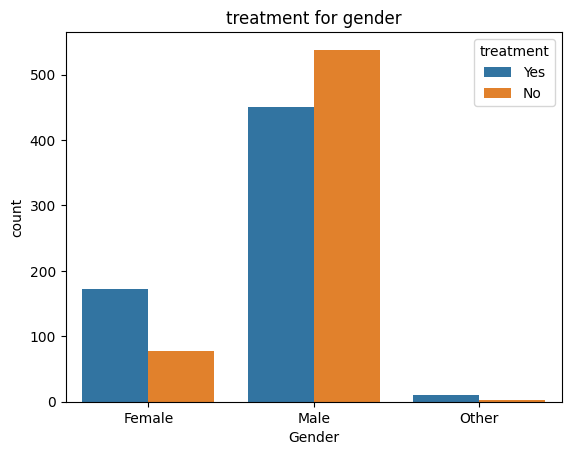

In [143]:
sns.countplot(x='Gender',hue='treatment',data=df)
plt.title("treatment for gender")
plt.xlabel('Gender')


c:\Users\PC\anaconda3\envs\Device\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


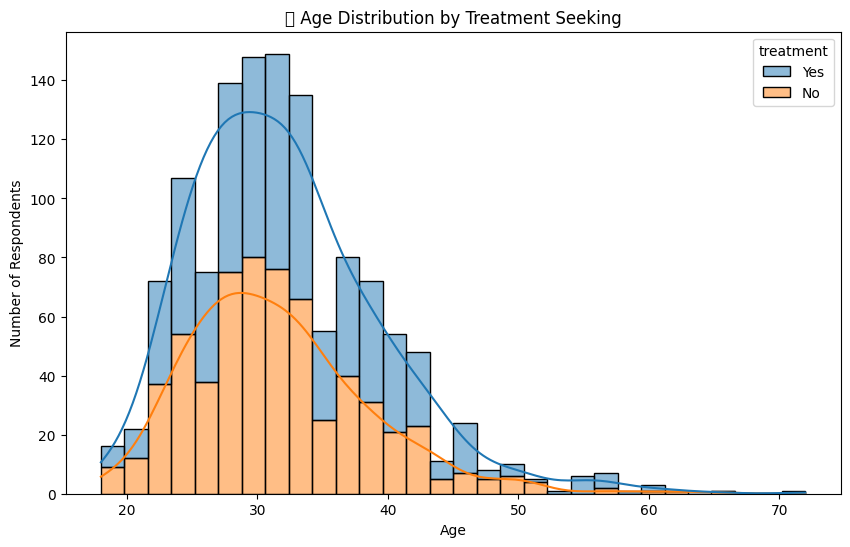

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='treatment', kde=True, multiple="stack", bins=30)
plt.title("📊 Age Distribution by Treatment Seeking")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.show()

c:\Users\PC\anaconda3\envs\Device\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


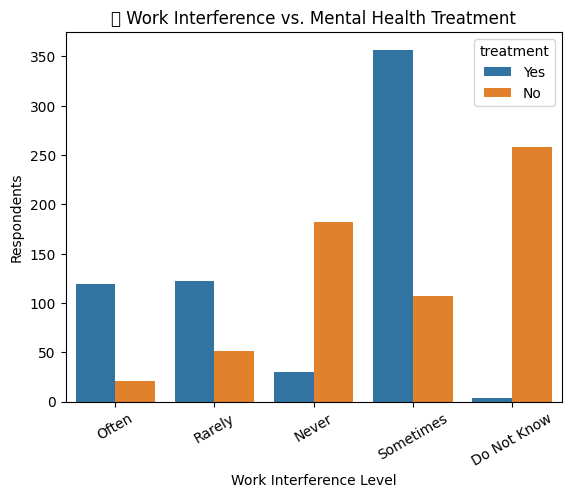

In [145]:
sns.countplot(x='work_interfere',hue='treatment',data=df)
plt.title("💼 Work Interference vs. Mental Health Treatment")
plt.xlabel("Work Interference Level")
plt.ylabel("Respondents")
plt.xticks(rotation=30)
plt.show()

c:\Users\PC\anaconda3\envs\Device\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


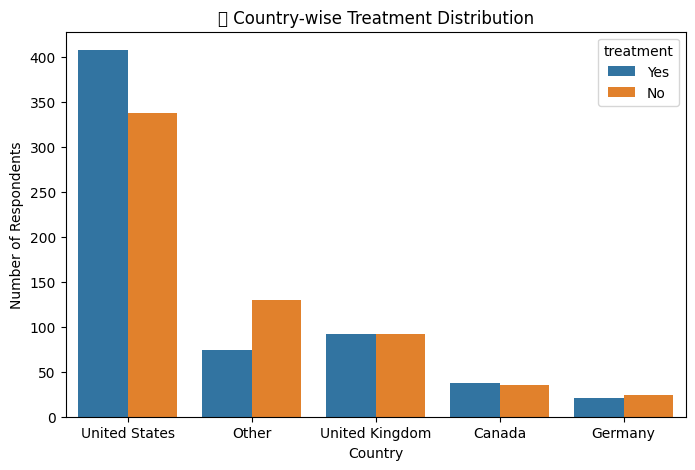

In [146]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Country', hue='treatment', order=df['Country'].value_counts().index)
plt.title("🌍 Country-wise Treatment Distribution")
plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.show()

In [147]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a copy of the dataset
df_encoded = df.copy()

# Apply label encoding to all categorical features
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Preview encoded data
df_encoded.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,4,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,4,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,3,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,4,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


In [148]:
X = df_encoded.drop('treatment', axis=1)
y = df_encoded['treatment']

C:\Users\PC\AppData\Local\Temp\ipykernel_11688\719641846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')


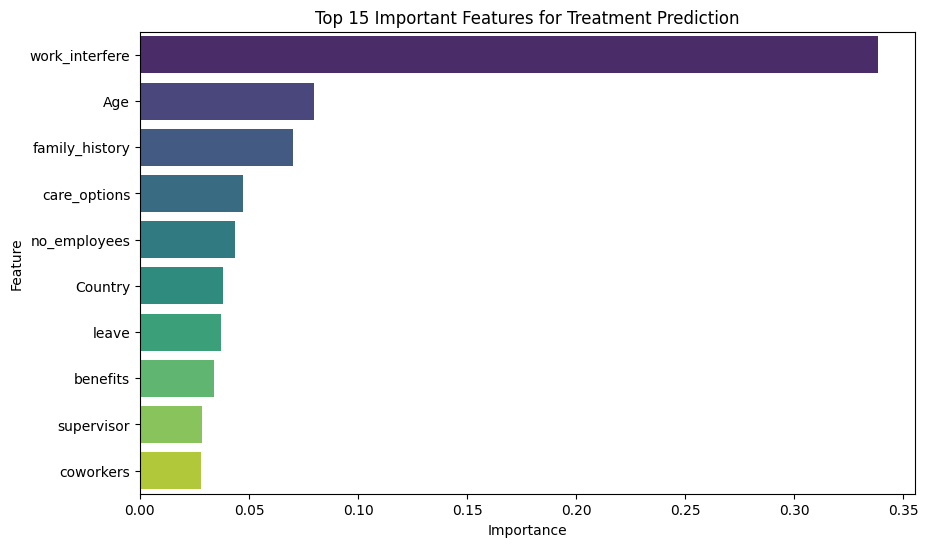

In [149]:
# Train a random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Important Features for Treatment Prediction')
plt.show()

In [150]:
from sklearn.model_selection import train_test_split, cross_val_score
# Assume you've selected top 15 features
top_features = feature_importance['Feature'].head(15)
X_selected = X[top_features]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

In [152]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    
    # Use scaling only for specific models
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))



🔹 Model: Logistic Regression
✅ Accuracy: 0.8008
📊 Classification Report:

              precision    recall  f1-score   support

          No       0.80      0.79      0.80       124
         Yes       0.80      0.81      0.80       127

    accuracy                           0.80       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.80      0.80      0.80       251


🔹 Model: K-Nearest Neighbors
✅ Accuracy: 0.7649
📊 Classification Report:

              precision    recall  f1-score   support

          No       0.79      0.72      0.75       124
         Yes       0.75      0.81      0.78       127

    accuracy                           0.76       251
   macro avg       0.77      0.76      0.76       251
weighted avg       0.77      0.76      0.76       251


🔹 Model: Decision Tree
✅ Accuracy: 0.7849
📊 Classification Report:

              precision    recall  f1-score   support

          No       0.77      0.80      0.79       124
         Yes      

c:\Users\PC\anaconda3\envs\Device\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:47:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

          No       0.83      0.81      0.82       124
         Yes       0.82      0.83      0.82       127

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251


🔹 Model: CatBoost
✅ Accuracy: 0.8446
📊 Classification Report:

              precision    recall  f1-score   support

          No       0.90      0.77      0.83       124
         Yes       0.81      0.91      0.86       127

    accuracy                           0.84       251
   macro avg       0.85      0.84      0.84       251
weighted avg       0.85      0.84      0.84       251


🔹 Model: LightGBM
[LightGBM] [Info] Number of positive: 505, number of negative: 495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c